# Heat equation with discrete thermal conuctivity 

**Heat Equation with continious Thermal conductivity**

100%|██████████| 80001/80001 [00:22<00:00, 3563.93it/s]


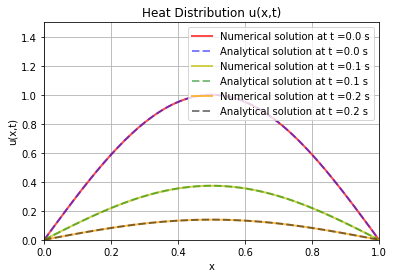

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
h = 0.01
#Time step 
k = 2.5*10**-5
r = k / (h**2) 
xdim = int(1 / h)
tdim = int(2 / k)
def w(x, t):
  return np.sin(np.pi * x ) * np.exp(-np.pi**2 * t)
#we define a step function that will serve as the initial condition 
def f(x):
    return np.sin(np.pi * x)
u = np.zeros((xdim+1, tdim+1))
limg = np.zeros( tdim+1)       
limd = np.zeros( tdim+1)        
disc = np.zeros( tdim+1)  
#Initial conditions
for i in np.arange(0, xdim+1, 1):
    x = 0
    x += h * i
    u[i, 0] = round(f(x), 3)
#Boundery conditions 
u[0,:] = 0.0
u[xdim,:] = 0.0
for j in tqdm(np.arange(0, tdim+1, 1)):
    #looping over space(x)
    for i in np.arange(1, xdim+1,1):
          if j != tdim and i != xdim:
            u[i, j+1] = (1-2*r) * u[i, j] + r*(u[i+1, j]+u[i-1, j])
#time index that correspond the normlized value of time
y = 0
y1 = 4000
y2 = 8000
#the value of normalized time 
t  = y  * k
t1 = y1 * k
t2 = y2 * k
x1 = np.linspace(0, 1, xdim+1)
plt.plot(x1, u[:,y], c='red',linewidth='2', alpha=0.7, label="Numerical solution at t ={} s".format(t))
plt.plot(x1, w(x1, t), c='blue', linestyle='dashed', linewidth='2',alpha=0.5, label="Analytical solution at t ={} s".format(t))
plt.plot(x1, u[:,y1], c='y',linewidth='2', alpha=0.7, label="Numerical solution at t ={} s".format(t1))
plt.plot(x1, w(x1, t1), c='g', linestyle='dashed', linewidth='2',alpha=0.5, label="Analytical solution at t ={} s".format(t1))
plt.plot(x1, u[:,y2], c='orange',linewidth='2', alpha=0.7, label="Numerical solution at t ={} s".format(t2))
plt.plot(x1, w(x1, t2), c='black', linestyle='dashed', linewidth='2',alpha=0.5, label="Analytical solution at t ={} s".format(t2))
plt.title("Heat Distribution u(x,t)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.xlim(0, 1)
plt.ylim(0, 1.5)
plt.grid()
plt.legend()
plt.show()


 **`Heat Equation with continious Thermal conductivity**`

  7%|▋         | 5742/80001 [00:03<00:40, 1856.11it/s]

At this time we can consider the function as continuous, t= 0.130175


100%|██████████| 80001/80001 [00:42<00:00, 1890.86it/s]


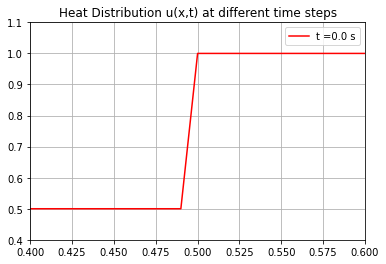

No handles with labels found to put in legend.


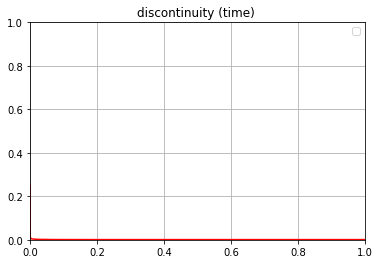

In [ ]:
#Solving a parabolic pde with a discrete thermal conductivity c(x)
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
#Space step
h = 0.01
#Time step 
k = 2.5*10**-5
r = k / (h**2) 
eps = 10**-3
counter = 0
#xdim and tdim serve as how many steps taking in the x-axis and t-axis
xdim = int(1 / h)
tdim = int(2 / k)
#we define a step function that will serve as the initial condition 
def f(x):
    return 0.5 if x < 0.5 else 1
u = np.zeros((xdim+1, tdim+1))
limg = np.zeros( tdim+1)       
limd = np.zeros( tdim+1)        
disc = np.zeros( tdim+1)        
#step function c(x), c(x) = 0 if x < 0.5, c(x)= 0.5 if x < 0.5
c = np.array([0.5 if i < (xdim+1) / 2 else 1 for i in np.arange(0, xdim+1, 1)])
#Initial conditions
for i in np.arange(0, xdim+1, 1):
    x = 0
    x += h * i
    u[i, 0] = round(f(x), 3)
#Boundary conditions 0 at both ends of the road
u[0,:] = 0.5
u[xdim,:] = 1
#looping over time(t)
for j in tqdm(np.arange(0, tdim+1, 1)):
    #looping over space(x)
    for i in np.arange(1, xdim+1,1):
          if j != tdim and i != xdim:
#            u[i, j+1] = r*(c[i] -2)*u[i, j]+r*(c[i]+(c[i+1]-c[i-1])/4)*u[i+1, j] +r*(c[i]-(c[i+1]-c[i-1])/4)*u[i-1,j];
            u[i, j+1] = u[i,j] + r*c[i]*(u[i+1,j]-2*u[i,j]+u[i-1,j])+r/4*(c[i+1]-c[i-1])*(u[i+1,j]-u[i-1,j])
#calcule la pente par la gauche
    penteg = (u[int((xdim+1)/2),j]-u[int((xdim+1)/2)-1,j])/h
#calcule la limite par la gauche lorsque x--> discontinuité   
    limg[j] = u[int((xdim+1)/2),j]+penteg*h/2 
# memes etapes par la droite
    pented = (u[int((xdim+1)/2)+2,j]-u[int((xdim+1)/2)+1,j])/h
    limd[j] = u[int((xdim+1)/2)+1,j] - pented * h/2 
# disc c'est la difference    
    disc[j]= abs(limd[j]-limg[j])
    if ((disc[j] < eps) and (counter == 0)) :
       print("At this time we can consider the function as continuous, t=", j*k) ; counter = 1 ; 
#time index that correspond the normlized value of time
y = 0
#the value of normalized time 
t = y * k
x1 = np.linspace(0, 1, xdim+1)
x2 = np.linspace(0, 2, tdim+1)

fig = plt.figure()
ax = plt.plot(x1, u[:,y], c='red', label="t ={} s".format(t))
plt.title("Heat Distribution u(x,t) at different time steps")
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 1.1)
plt.grid()
plt.legend()
plt.show()

x = np.linspace(0, 2, tdim+1)
fig = plt.figure()
ax = plt.plot(x, disc[:], c='red')
plt.title("discontinuity (time) ")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()
